In [1]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re

In [2]:
data_dir = '/kaggle/input/cuhk-face-sketch-database-cufs/photos/'

In [3]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '../input/cuhk-face-sketch-database-cufs/photos'
img_array = []

sketch_path = '../input/cuhk-face-sketch-database-cufs/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|██████████| 188/188 [00:01<00:00, 99.52it/s] 


In [4]:
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

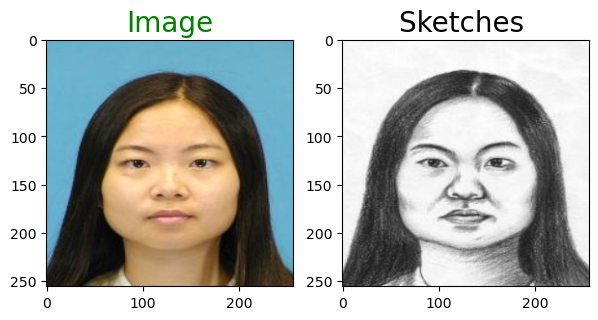

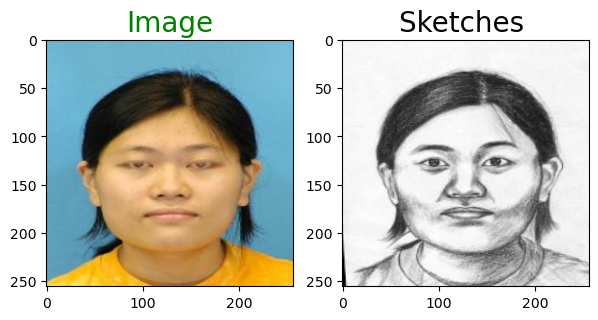

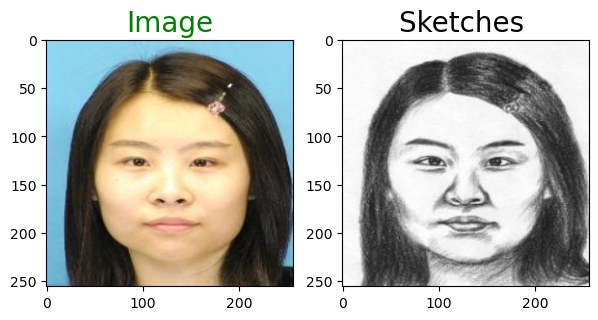

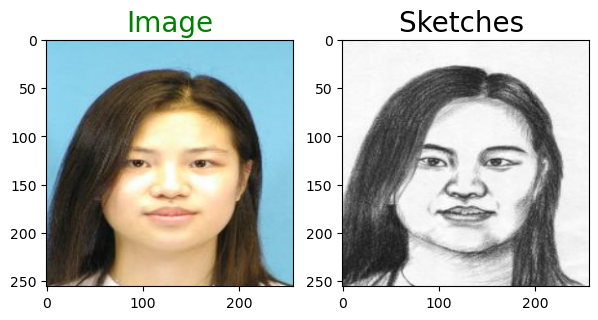

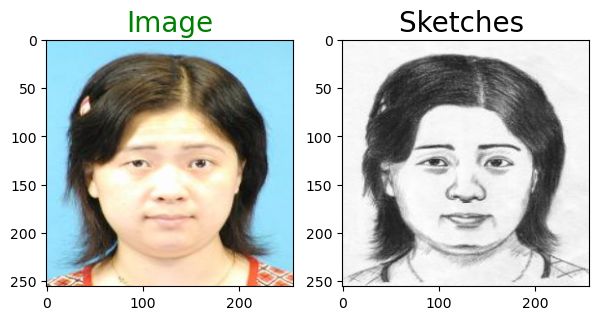

In [5]:
ls = [i for i in range(0,33,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])

In [6]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (104, 256, 256, 3)


In [7]:
import tensorflow as tf
from tensorflow.keras import Model, layers, Sequential

input_shape = (256, 256, 3)

encoder = Sequential([
    layers.Conv2D(input_shape=input_shape, activation='relu', filters=32, kernel_size=(3, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), padding='same')
])

encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [8]:
decoder = Sequential([
    layers.Conv2D(input_shape=(32, 32, 128), activation='relu', filters=128, kernel_size=(3, 3), padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(activation='relu', filters=64, kernel_size=(3, 3), padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(activation='relu', filters=32, kernel_size=(3, 3), padding='same'),
    layers.UpSampling2D((2, 2)),
    
    layers.Conv2D(filters=3, kernel_size=(3, 3), padding='same', activation='relu')
])

decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 up_sampling2d (UpSampling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 up_sampling2d_2 (UpSampling  (None, 256, 256, 32)    

In [9]:
autoencoder = Sequential((encoder, decoder))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 128)       93248     
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       240707    
                                                                 
Total params: 333,955
Trainable params: 333,955
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(optimizer='adam',
                   loss='mse', metrics=['accuracy'])

autoencoder.fit(train_image, train_sketch_image, epochs=25)

Epoch 1/25
44/44 [==============================] - 23s 211ms/step - loss: 0.0940 - accuracy: 0.3327
Epoch 2/25
44/44 [==============================] - 7s 157ms/step - loss: 0.0332 - accuracy: 0.2461
Epoch 3/25
44/44 [==============================] - 7s 158ms/step - loss: 0.0291 - accuracy: 0.3355
Epoch 4/25
44/44 [==============================] - 7s 162ms/step - loss: 0.0276 - accuracy: 0.3159
Epoch 5/25
44/44 [==============================] - 7s 161ms/step - loss: 0.0262 - accuracy: 0.3568
Epoch 6/25
44/44 [==============================] - 7s 161ms/step - loss: 0.0260 - accuracy: 0.3498
Epoch 7/25
44/44 [==============================] - 7s 160ms/step - loss: 0.0257 - accuracy: 0.3735
Epoch 8/25
44/44 [==============================] - 7s 158ms/step - loss: 0.0250 - accuracy: 0.3842
Epoch 9/25
44/44 [==============================] - 7s 160ms/step - loss: 0.0253 - accuracy: 0.3758
Epoch 10/25
44/44 [==============================] - 7s 158ms/step - loss: 0.0246 - accuracy: 0.397

In [13]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

1/1 [==============================] - 0s 24ms/step


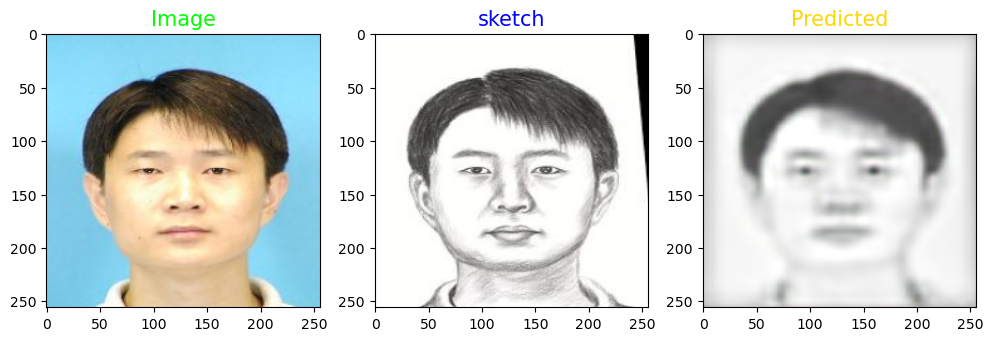

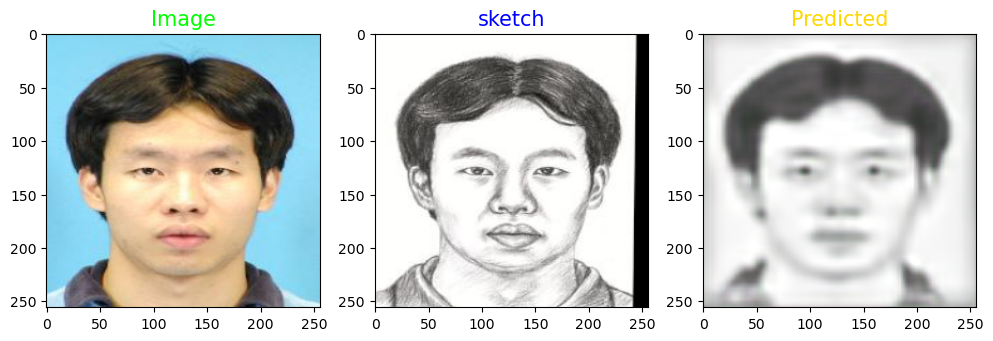

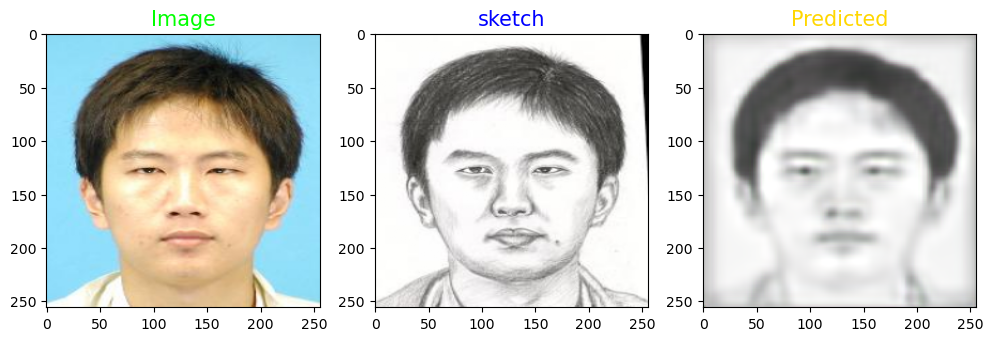

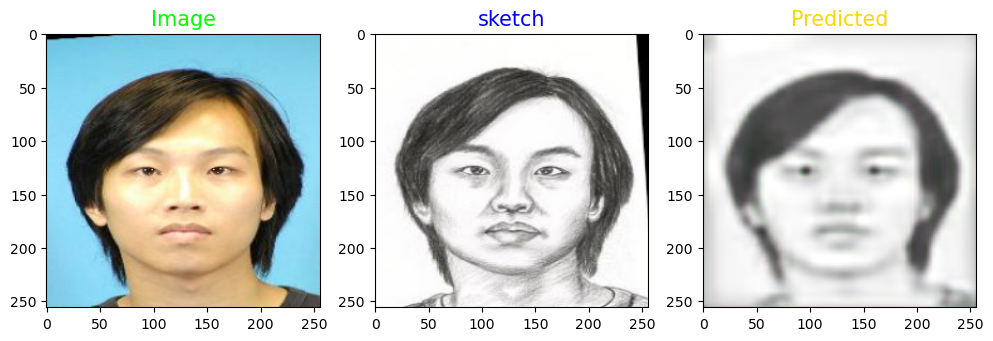

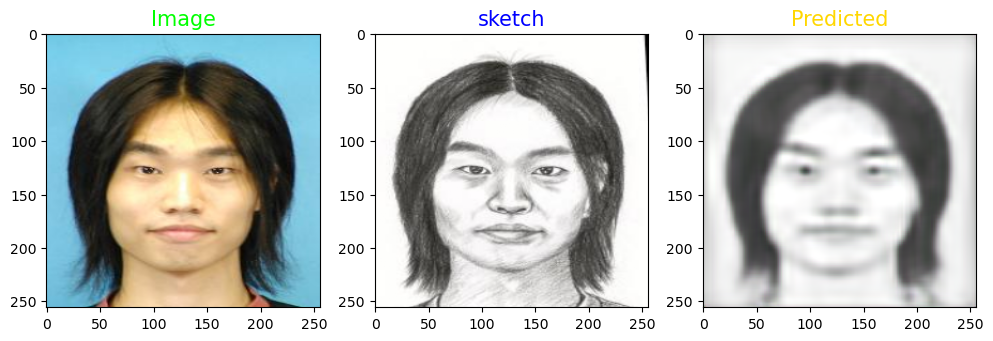

In [14]:
ls = [i for i in range(0,33,8)]
for i in ls:
    predicted =np.clip(autoencoder.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images(test_image[i],test_sketch_image[i],predicted)